In [27]:
import numpy as np
import pandas as pd
import torch

In [28]:
x=torch.empty(3,5)
x

tensor([[1.3570e-14, 1.0899e+27, 1.2712e+31, 7.6814e+31, 3.8946e+21],
        [4.4650e+30, 1.7590e+22, 2.4176e-12, 2.6209e+20, 4.1641e+12],
        [8.9625e-01, 7.9309e+34, 7.9439e+08, 3.2604e-12, 7.3113e+34]])

In [29]:
torch.randn(5,3)

tensor([[-0.2945,  0.0324,  1.0855],
        [-1.8957, -1.2575, -1.4808],
        [ 0.5408, -0.0885, -1.1317],
        [-0.2204, -0.2654, -0.7563],
        [ 0.0587, -0.0081, -0.0218]])

In [30]:
x=torch.zeros(5,3)
x.shape

torch.Size([5, 3])

In [31]:
y=torch.zeros_like(torch.tensor(x))
y

C:\Users\sunyu\AppData\Local\Temp\ipykernel_11476\2705283038.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y=torch.zeros_like(torch.tensor(x))


tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])

In [32]:
x=torch.randn(4,4)
x.size()
x.view(16)

tensor([ 0.6808, -0.2894, -0.9267, -0.4103,  0.9335,  0.8580, -0.6494, -0.3313,
         0.8136,  0.5357, -0.4031, -0.0750, -1.4005, -1.5039,  2.1590,  0.4060])

In [33]:
x_cp=torch.rand(3,5).clone().view(-1,3)
x_cp

tensor([[0.0342, 0.3521, 0.5508],
        [0.8416, 0.4749, 0.8930],
        [0.8862, 0.7626, 0.6950],
        [0.0454, 0.1142, 0.9347],
        [0.7405, 0.6293, 0.5932]])

In [34]:
x=torch.randn(1)
x.item()

-0.4343627691268921

In [35]:
x.view(-1,8)

RuntimeError: shape '[-1, 8]' is invalid for input of size 1

In [ ]:
x=torch.arange(1,3).view(1,2)
y=torch.arange(1,4).view(3,1)
x+y

In [ ]:
x=torch.tensor([1,2])
y=torch.tensor([3,4])
id_1=id(y)
y=x+y
id(y)==id_1

In [ ]:
x=torch.tensor([1,2])
y=torch.tensor([3,4])
id_1=id(y)
y[:]=x+y
id(y)==id_1

In [ ]:
if torch.cuda.is_available():
    device=torch.device("cuda")
    y=torch.ones_like(x,device=device)
    x=x.to(device)
    z=x+y
    print(z)
    print(z.to('cpu'))

In [ ]:
a=np.arange(12)
b=torch.from_numpy(a)
type(a),type(b)

In [ ]:
a=torch.ones(5,3)
b=a.numpy()
b

In [ ]:
import numpy as np
a=np.ones([5,2])
b=torch.from_numpy(a)
b

In [ ]:
x=torch.randn(3,4,requires_grad=True)
x

In [ ]:
b=torch.randn(3,4,requires_grad=True)
b

In [ ]:
t=x+b
t

In [ ]:
y=t.sum()
y

In [ ]:
y.backward()

In [ ]:
b.grad

In [ ]:
x.requires_grad,b.requires_grad,t.requires_grad,y.requires_grad

In [ ]:
x=torch.randn(1)
b=torch.randn(1,requires_grad=True)
w=torch.randn(1,requires_grad=True)
y=w*x
z=y+b

In [ ]:
x.requires_grad,w.requires_grad,b.requires_grad,y.requires_grad,z.requires_grad

In [ ]:
x.is_leaf,y.is_leaf

In [ ]:
# z.backward(retain_graph=True)
z.backward()

In [ ]:
x

In [ ]:
w.grad,b.grad

In [ ]:
x=[i for i in range(11)]
x_train=np.array(x,dtype=np.float32)
x_train=x_train.reshape(-1,1)
x_train.shape

In [ ]:
y=[i*2+1 for i in range(11)]
y_train=np.array(y,dtype=np.float32)
y_train=y_train.reshape(-1,1)
y_train.shape

In [ ]:
import torch
import torch.nn as nn
class LinearRegressionModel(nn.Module):
    def __init__(self,input_dim,output_dim):
        super(LinearRegressionModel,self).__init__()
        self.linear=nn.Linear(input_dim,output_dim)
    def forward(self,x):
        out=self.linear(x)
        return out

In [ ]:
input_dim=1
output_dim=1

model=LinearRegressionModel(input_dim,output_dim)
device=torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model.to(device)

In [ ]:
model

In [ ]:
epochs=10000
learning_rate=0.01
optimizer=torch.optim.SGD(model.parameters(),lr=learning_rate)
criterion=nn.MSELoss()

In [ ]:
for epoch in range(epochs):
    epoch+=1

    inputs=torch.from_numpy(x_train).to(device)
    labels=torch.from_numpy(y_train).to(device)

    optimizer.zero_grad()

    outputs=model(inputs)

    loss=criterion(outputs,labels)

    loss.backward()

    optimizer.step()

    if epoch %50==0:
        print(loss.item())

In [ ]:
# pre=model(torch.from_numpy(x_train).requires_grad_()).data
# pre

pre = model(inputs).cpu().detach().numpy()
pre

In [ ]:
import os

In [51]:
import os
import pandas as pd
data_dir = '../data_struct/data'
if not os.path.exists(data_dir):
    os.makedirs(data_dir)

data_file = os.path.join(data_dir, 'house_tiny.csv')
with open(data_file, 'w') as f:
    f.write('NumRooms,Alley,Price\n')
    f.write('NA,Pave,127500\n')
    f.write('2,NA,106000\n')
    f.write('4,NA,178100\n')
    f.write('NA,NA,140000\n')


In [52]:
data=pd.read_csv(data_file)
data.columns=['NumRooms','Alley','Price']
data

,NumRooms,Alley,Price
0,NaN,Pave,127500
1,2.0,NaN,106000
2,4.0,NaN,178100
3,NaN,NaN,140000


In [53]:
data['NumRooms'].fillna(data['NumRooms'].mean(),inplace=True)
data


,NumRooms,Alley,Price
0,3.0,Pave,127500
1,2.0,NaN,106000
2,4.0,NaN,178100
3,3.0,NaN,140000


In [54]:
k=pd.get_dummies(data.Alley,dummy_na=True)
k
data=data.join(k)
data

,NumRooms,Alley,Price,Pave,NaN
0,3.0,Pave,127500,1,0
1,2.0,NaN,106000,0,1
2,4.0,NaN,178100,0,1
3,3.0,NaN,140000,0,1


In [55]:
data=data.drop('Alley',axis=1,inplace=True)
data

,NumRooms,Price,Pave,NaN
0,3.0,127500,1,0
1,2.0,106000,0,1
2,4.0,178100,0,1
3,3.0,140000,0,1


In [56]:
outputs=data.Price
data.drop('Price',axis=1,inplace=True)
outputs,data

(0    127500
 1    106000
 2    178100
 3    140000
 Name: Price, dtype: int64,
    NumRooms  Pave  NaN
 0       3.0     1    0
 1       2.0     0    1
 2       4.0     0    1
 3       3.0     0    1)

In [58]:
x,y=torch.tensor(data.values),torch.tensor(outputs.values)
x,y

(tensor([[3., 1., 0.],
         [2., 0., 1.],
         [4., 0., 1.],
         [3., 0., 1.]], dtype=torch.float64),
 tensor([127500, 106000, 178100, 140000]))

In [66]:
from torch import tensor

x=tensor([0,1,2,3,4])
x

tensor([0, 1, 2, 3, 4])

In [68]:

x,x.shape

(tensor([0, 1, 2, 3, 4]), torch.Size([5]))

In [70]:
A=torch.arange(20).view(-1,5)
A,A.T

(tensor([[ 0,  1,  2,  3,  4],
         [ 5,  6,  7,  8,  9],
         [10, 11, 12, 13, 14],
         [15, 16, 17, 18, 19]]),
 tensor([[ 0,  5, 10, 15],
         [ 1,  6, 11, 16],
         [ 2,  7, 12, 17],
         [ 3,  8, 13, 18],
         [ 4,  9, 14, 19]]))

In [81]:
A=torch.arange(20).view(-1,4)
A

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11],
        [12, 13, 14, 15],
        [16, 17, 18, 19]])

In [82]:
A.sum(axis=0),A.sum(axis=1)

(tensor([40, 45, 50, 55]), tensor([ 6, 22, 38, 54, 70]))

In [83]:
A.sum(axis=1,keepdims=True),A.sum(axis=0,keepdims=True)

(tensor([[ 6],
         [22],
         [38],
         [54],
         [70]]),
 tensor([[40, 45, 50, 55]]))

In [97]:
x=torch.arange(4)
A,x,A.shape,x.shape,A*x,torch.dot(x,x),torch.mv(A,x),

(tensor([[ 0,  1,  2,  3],
         [ 4,  5,  6,  7],
         [ 8,  9, 10, 11],
         [12, 13, 14, 15],
         [16, 17, 18, 19]]),
 tensor([0, 1, 2, 3]),
 torch.Size([5, 4]),
 torch.Size([4]),
 tensor([[ 0,  1,  4,  9],
         [ 0,  5, 12, 21],
         [ 0,  9, 20, 33],
         [ 0, 13, 28, 45],
         [ 0, 17, 36, 57]]),
 tensor(14),
 tensor([ 14,  38,  62,  86, 110]))

In [90]:
B=torch.arange(12).view(-1,3)
torch.mm(A,B),A,B

(tensor([[ 42,  48,  54],
         [114, 136, 158],
         [186, 224, 262],
         [258, 312, 366],
         [330, 400, 470]]),
 tensor([[ 0,  1,  2,  3],
         [ 4,  5,  6,  7],
         [ 8,  9, 10, 11],
         [12, 13, 14, 15],
         [16, 17, 18, 19]]),
 tensor([[ 0,  1,  2],
         [ 3,  4,  5],
         [ 6,  7,  8],
         [ 9, 10, 11]]))

In [127]:
u=torch.tensor([3,4],dtype=float,device='cuda')
torch.norm(u)

tensor(5., device='cuda:0', dtype=torch.float64)

In [131]:
x=torch.ones([4, 9])
x,torch.linalg.norm(x)

(tensor([[1., 1., 1., 1., 1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1., 1., 1., 1., 1.]]),
 tensor(6.))

In [151]:
x=torch.arange(4,requires_grad=True,dtype=float)
x.grad

In [152]:
y=2*torch.dot(x,x)
y

tensor(28., dtype=torch.float64, grad_fn=<MulBackward0>)

In [153]:
y.backward()
x.grad==4*x,x.grad

(tensor([True, True, True, True]),
 tensor([ 0.,  4.,  8., 12.], dtype=torch.float64))

In [173]:
x.grad.zero_()
y=sum(x)
y.backward()
x.grad

tensor([1., 1., 1., 1.], dtype=torch.float64)

In [174]:
x.grad.zero_()
y=x*x
y.sum().backward()
x.grad

tensor([0., 2., 4., 6.], dtype=torch.float64)

In [178]:
x.grad.zero_()
y=x*x
u=y.detach()
z=u*x
z.sum().backward()
x.grad==u

tensor([True, True, True, True])

In [179]:
x.grad.zero_()
y.sum().backward()
x.grad

tensor([0., 2., 4., 6.], dtype=torch.float64)

In [265]:
def f(a):
    b = a * 2
    while b.norm() < 1000:
        b = b * 2
    if b.sum() > 0:
        c = b
    else:
        c = 100 * b
    return c

a = torch.randn(size=(), requires_grad=True)

d = f(a)
d.backward()

a.grad==d/a

tensor(True)

In [280]:
def chouka(m,k):
    n=len(m)
    for i in range(k):
        p=np.random.randint(0,n)
        m[p]+=1
    return m
m=np.zeros(10)
chouka(m,100000)
np.var(m),np.std(m)

(4455.6, 66.75028089828537)

In [296]:
import time


class Timer:  #@save
    """记录多次运行时间"""
    def __init__(self):
        self.times = []
        self.start()

    def start(self):
        """启动计时器"""
        self.tik = time.time()

    def stop(self):
        """停止计时器并将时间记录在列表中"""
        self.times.append(time.time() - self.tik)
        return self.times[-1]

    def avg(self):
        """返回平均时间"""
        return sum(self.times) / len(self.times)

    def sum(self):
        """返回时间总和"""
        return sum(self.times)

    def cumsum(self):
        """返回累计时间"""
        return np.array(self.times).cumsum().tolist()

In [297]:
n=10000
a=torch.ones(n)
b=torch.ones(n)
a,b

(tensor([1., 1., 1.,  ..., 1., 1., 1.]),
 tensor([1., 1., 1.,  ..., 1., 1., 1.]))

In [298]:
c=torch.zeros(n)
timer = Timer()
for i in range(n):
    c[i] = a[i] + b[i]
f'{timer.stop():.5f} sec'

'0.06353 sec'

In [300]:
timer.start()
d=a+b
f'{timer.stop():.5f} sec'

'0.00100 sec'

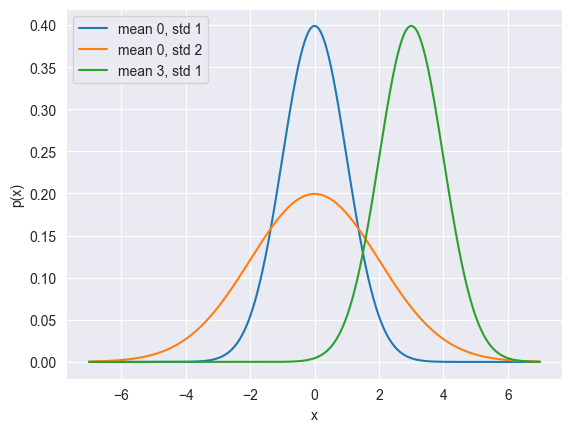

In [311]:
import numpy as np
import matplotlib.pyplot as plt

def normal(x, mu, sigma):
    p = 1 / np.sqrt(2 * np.pi * sigma**2)
    return p * np.exp(-0.5 / sigma**2 * (x - mu)**2)

# generate x values from -7 to 7 with a step size of 0.01
x = np.arange(-7, 7, 0.01)

# define mean and standard deviation pairs
params = [(0, 1), (0, 2), (3, 1)]

# plot normal distributions for each mean and standard deviation pair
for mu, sigma in params:
    plt.plot(x, normal(x, mu, sigma), label=f'mean {mu}, std {sigma}')

# set axis labels and legend
plt.xlabel('x')
plt.ylabel('p(x)')
plt.legend()
plt.show()


In [2]:

torch.normal(0, 1, (1000, 2))

NameError: name 'torch' is not defined